## What is the Task About? How Does This Work?
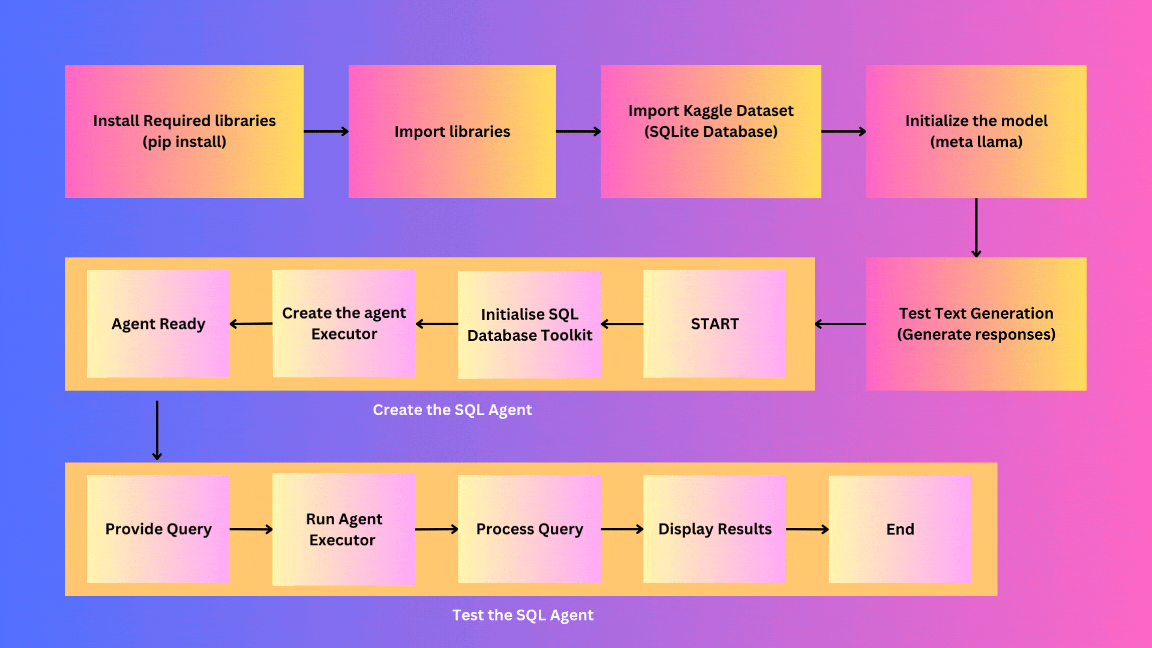


### Step 1: Install Required Libraries

In the first cell of your Colab notebook, install the necessary libraries.

In [ ]:
!pip install -q -U langchain
!pip install -q -U transformers
!pip install -q -U accelerate
!pip install -q -U bitsandbytes


- **LangChain**: A framework for building applications with language models.



### Step 2: **Import Libraries**

After installing the library, import the necessary modules for your code.

In [ ]:
import torch
from transformers import pipeline
from langchain.llms import HuggingFacePipeline
from transformers import AutoTokenizer, AutoModelForCausalLM
from langchain.agents import create_sql_agent
from langchain.agents.agent_toolkits import SQLDatabaseToolkit
from langchain.sql_database import SQLDatabase
from langchain.agents import AgentExecutor
from langchain.agents.agent_types import AgentType
from time import time


- **SQLDatabase**: A module from Langchain for interacting with SQL databases.




#### Step 3. **Import the Kaggle Dataset**

Let's setup the database connection.

In [ ]:
sqlite_path = "/kaggle/input/24169-pitchfork-reviews/data.sqlite3"
sqlite_uri = f"sqlite:///{sqlite_path}"
db = SQLDatabase.from_uri(sqlite_uri)


- **SQLite Database**: A lightweight, disk-based database that doesn't require a separate server process.


### Step 4:  **Intialize the model**



In [ ]:
# Load the model and tokenizer directly from Hugging Face
llm_pipeline = pipeline(
    "text-generation",
    model="meta-llama/Llama-2-13b-chat-hf",
    torch_dtype="bfloat16",
    device_map="auto",
    trust_remote_code=True
)


### Step 4:  **Test the code**



In [ ]:
# Generate text
output = llm_pipeline(
    "Hello! Are you into bands? Can you name a few?",
    max_length=200,
    temperature=0.7,
    top_k=50,
    top_p=0.95,
    num_return_sequences=1
)


In [ ]:
# Print the result
print(output[0]['generated_text'])


### Step 5:  **Create the SQL Agent**

Now, let's create the SQL Agent

In [ ]:
toolkit = SQLDatabaseToolkit(db=db, llm=llm_pipeline)

In [ ]:
agent_executor = create_sql_agent(
    llm=llm_pipeline,
    toolkit=toolkit,
    verbose=True,
    agent_type=AgentType.ZERO_SHOT_REACT_DESCRIPTION,
)


### Step 6:  **Test the SQL Agent**


In [ ]:
question = "Give me names of known artists"
agent_executor.run(question)


### Additional Resources

- **SQLite**: [SQLite Documentation](https://www.sqlite.org/docs.html)
- **Langchain GitHub**: [Langchain GitHub](https://github.com/langchain/langchain)
- **SQL**: [Notepad References](https://drive.google.com/file/d/1nWdoKvFdMFDo9YUNkdMSZWCI3a7Qasef/view?usp=sharing)